In [14]:
import time 
import requests
import cv2
import operator
import numpy as np
from __future__ import print_function
import httplib, urllib, base64
import pprint
import json
import cognitive_face as CF

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline 
# Display images within Jupyter

In [3]:
_url = 'https://westus.api.cognitive.microsoft.com/emotion/v1.0/recognize'
_key = '1cdfbf875f654421a30e3ec4bd4afa54'
_maxNumRetries = 10

In [4]:
def processRequest( json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429: 

            print( "Message: %s" % ( response.json()['error']['message'] ) )

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json()['error']['message'] ) )

        break
        
    return result

In [5]:
def renderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""
    
    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        cv2.rectangle( img,(faceRectangle['left'],faceRectangle['top']),
                           (faceRectangle['left']+faceRectangle['width'], faceRectangle['top'] + faceRectangle['height']),
                       color = (255,0,0), thickness = 5 )


    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        currEmotion = max(currFace['scores'].items(), key=operator.itemgetter(1))[0]


        textToWrite = "%s" % ( currEmotion )
        cv2.putText( img, textToWrite, (faceRectangle['left'],faceRectangle['top']-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1 )

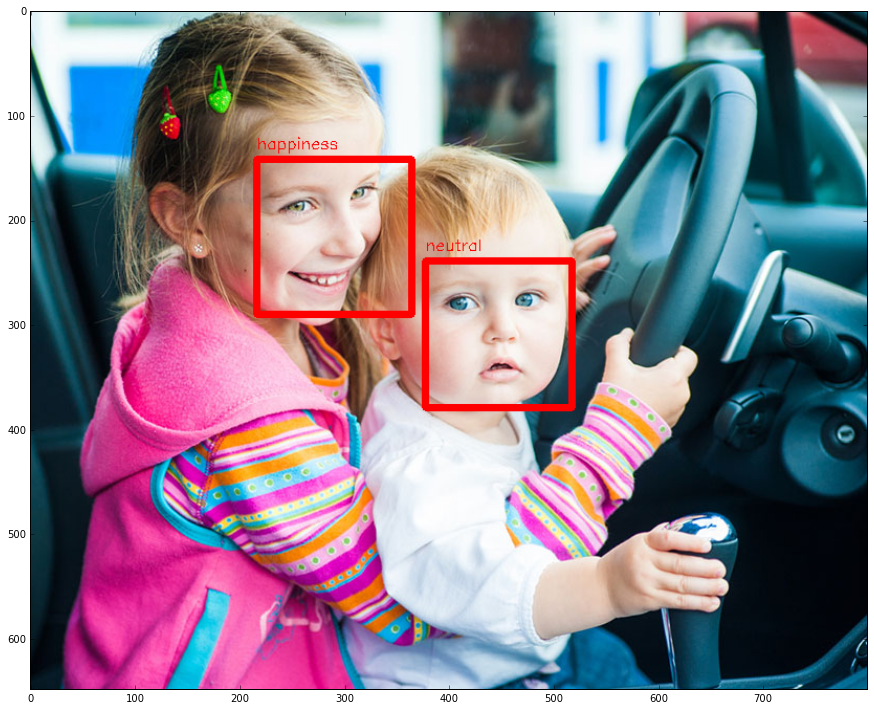

In [6]:
# URL direction to image
urlImage = 'https://raw.githubusercontent.com/Microsoft/ProjectOxford-ClientSDK/master/Face/Windows/Data/detection3.jpg'

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/json' 

json = { 'url': urlImage } 
data = None
params = None

result = processRequest( json, data, headers, params )

if result is not None:
    # Load the original image, fetched from the URL
    arr = np.asarray( bytearray( requests.get( urlImage ).content ), dtype=np.uint8 )
    img = cv2.cvtColor( cv2.imdecode( arr, -1 ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img )

    ig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow( img )

In [7]:
# Load raw image file into memory
pathToFileInDisk = r'/home/administrator/Downloads/hoto2.jpg'
with open( pathToFileInDisk, 'rb' ) as f:
    data = f.read()

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/octet-stream'

json = None
params = None

result = processRequest( json, data, headers, params )

if result is not None:
    # Load the original image from disk
    data8uint = np.fromstring( data, np.uint8 ) # Convert string to an unsigned int array
    img = cv2.cvtColor( cv2.imdecode( data8uint, cv2.IMREAD_COLOR ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img )

    ig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow( img )


IOError: [Errno 2] No such file or directory: '/home/administrator/Downloads/hoto2.jpg'

In [11]:
headers = {
    # Request headers. Replace the placeholder key below with your subscription key.
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': '1cdfbf875f654421a30e3ec4bd4afa54',
}

params = urllib.urlencode({
})

# Replace the example URL below with the URL of the image you want to analyze.
body = "{ 'url': 'http://the-dentalspa.co.uk/wp-content/uploads/2014/04/group-smiling-660x270.jpg' }"

try:
    # NOTE: You must use the same region in your REST call as you used to obtain your subscription keys.
    #   For example, if you obtained your subscription keys from westcentralus, replace "westus" in the 
    #   URL below with "westcentralus".
    conn = httplib.HTTPSConnection('westus.api.cognitive.microsoft.com')
    conn.request("POST", "/emotion/v1.0/recognize?%s" % params, body, headers)
    response = conn.getresponse()
    data = response.read()
    pprint.pprint(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################



'{"error":{"code":"BadBody","message":"JSON parsing error."}}'


In [16]:
KEY = '1cdfbf875f654421a30e3ec4bd4afa54'  # Replace with a valid subscription key (keeping the quotes in place).
CF.Key.set(KEY)

# You can use this example JPG or replace the URL below with your own URL to a JPEG image.
img_url = 'https://raw.githubusercontent.com/Microsoft/Cognitive-Face-Windows/master/Data/detection1.jpg'
result = CF.face.detect(img_url)
print(result)


CognitiveFaceException: Error when calling Cognitive Face API:
	status_code: 401
	code: Unspecified
	message: Access denied due to invalid subscription key. Make sure you are subscribed to an API you are trying to call and provide the right key.
